Целью данной работы было: ознакомление с библиотеками для работы с картинками: PIL, OpenCV, Skimage

Задачи: 1. Скачать и открыть изображение(фото)
        2. Кроп, ресайз, вращение на произвольный угол этого изображения
        3. Произвольная деформация, блюр...
Выводы: Ознакомился с базовыми операциями в вышеперечисленных библиотеках. Хотя, конечно, это верхушка айсберга, т.к. функционал, конечно, поражает воображение

In [29]:
import PIL
from PIL import  Image, ImageFilter

image = Image.open("picture.jpeg")

In [22]:
width, height = image.size
left = 10
top = height / 5
right = 100
bottom = 1 * height / 4
im1 = image.crop((left, top, right, bottom)) # cropping
im1.show()

In [18]:
image_new = image.resize((500, 500)) # resize
image_new.show()

In [39]:
image_rot_90 = image.rotate(90) # rotation
image_rot_90.show()

In [40]:
width, height = image.size
m = -0.5 # transformation
xshift = abs(m) * width
new_width = width + int(round(xshift))
image_ = image.transform((new_width, height), Image.AFFINE,
        (1, m, -xshift if m > 0 else 0, 0, 1, 0), Image.BICUBIC)
image_.show()  

In [47]:
blurred = image.filter(ImageFilter.GaussianBlur(radius = 10)) # blur
blurred.show()

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [49]:
image = cv2.imread("picture.jpeg") # import

In [50]:
def viewImage(image, name_of_window):
    
    """программа для просмотра картинки, чтоб каждый раз не писать "imshow" """
    
    cv2.namedWindow(name_of_window, cv2.WINDOW_NORMAL)
    cv2.imshow(name_of_window, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [51]:
# corpping
# image[y:y + высота, x:x + ширина].
cropped = image[10:500, 500:2000]
viewImage(cropped, "Monkey after copping")

In [52]:
# resizing
scale_percent = 20 # Процент от изначального размера
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
viewImage(resized, "После изменения размера на 20 %")

In [ ]:
#rotation
(h, w, d) = image.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
viewImage(rotated, "monkey after 180 degree rotation")

In [54]:
#blur
blurred = cv2.GaussianBlur(image, (51, 51), 0)
viewImage(blurred, "blured monkey")

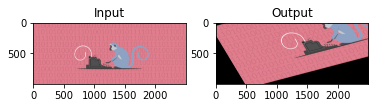

In [55]:
#transformation
rows,cols,ch = image.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(image,M,(cols,rows))
plt.subplot(121),plt.imshow(image),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [62]:
from skimage import transform, io,  draw
from skimage.transform import PiecewiseAffineTransform, warp
from skimage.feature import CENSURE
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.util import crop
import skimage

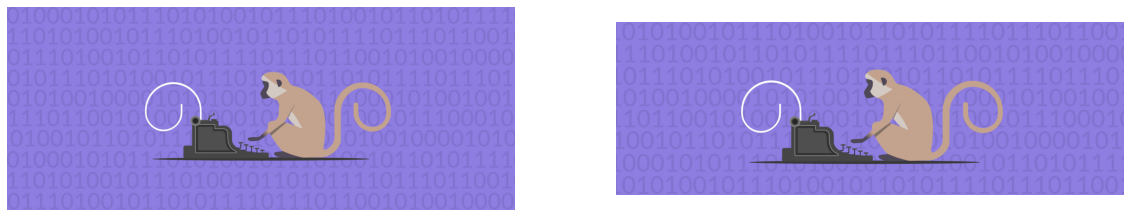

In [57]:
#croping!
image = io.imread('picture.jpeg')
image_ = crop(image, ((100, 100), (100, 50), (0,0)), copy=False)
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(image), plt.axis('off') 
plt.subplot(122), plt.imshow(image_), plt.axis('off') 
plt.show()

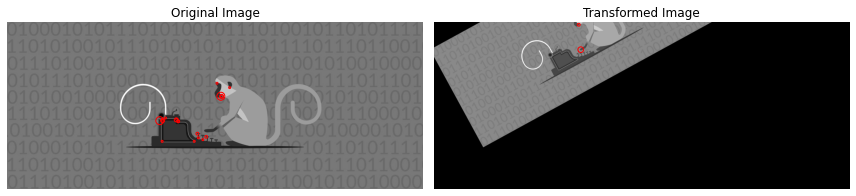

In [60]:
# transfomation around transverse axis
img_orig = rgb2gray(io.imread('picture.jpeg'))
tform = transform.AffineTransform(scale=(1.5, 1.5), rotation=0.5,
                                  translation=(150, -200))
img_warp = transform.warp(img_orig, tform)

detector = CENSURE()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_orig)

ax[0].imshow(img_orig, cmap=plt.cm.gray)
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(img_warp)

ax[1].imshow(img_warp, cmap=plt.cm.gray)
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

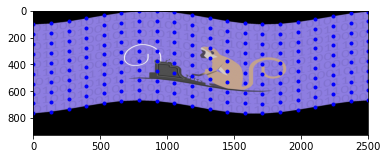

In [61]:
image = io.imread('picture.jpeg')
rows, cols = image.shape[0], image.shape[1]

src_cols = np.linspace(0, cols, 20)
src_rows = np.linspace(0, rows, 10)
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

# add cosinusoidal oscillation to row coordinates
dst_rows = src[:, 1] - np.cos(np.linspace(0, 3 * np.pi, src.shape[0])) * 50
dst_cols = src[:, 0]
dst_rows *= 1.5
dst_rows -= 1.5 * 50
dst = np.vstack([dst_cols, dst_rows]).T


tform = PiecewiseAffineTransform()
tform.estimate(src, dst)

out_rows = image.shape[0] - 1.5 * 50
out_cols = cols
out = warp(image, tform, output_shape=(out_rows, out_cols))

fig, ax = plt.subplots()
ax.imshow(out)
ax.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.b')
ax.axis((0, out_cols, out_rows, 0))
plt.show()

<ipython-input-68-22f66b33dd14>:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  gau_img = skimage.filters.gaussian(image, sigma=100, truncate=2/5)


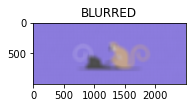

In [68]:
gau_img = skimage.filters.gaussian(image, sigma=100, truncate=2/5)
plt.subplot(121),plt.imshow(gau_img),plt.title('BLURRED');

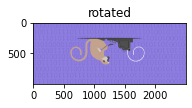

In [70]:
img_rot = transform.rotate(image, 180, resize=True, cval=1, mode ='constant')
plt.subplot(121),plt.imshow(img_rot),plt.title('rotated');